## AdaBoost Algorithm

- AdaBoost, short for Adaptive Boosting, is a powerful algorithm in machine learning that falls under the category of ensemble methods.
  
- Ensemble methods combine multiple models to create a single, more robust model.

- In AdaBoost's case, it specifically focuses on combining weak learners into a strong learner.

- **Weighted Training Instances**: It starts by assigning equal weights to all instances in the training data.

- **Train a Weak Learner**: The algorithm then trains a weak learner, which can be any basic classification algorithm like a decision tree.

- **Evaluate Learner Performance**: It evaluates the performance of the weak learner on the training data. Instances that the weak learner misclassified get higher weights in the next iteration. This forces the next learner to focus on the "harder" examples.

- **Repeat and Combine Learners**: This process of training a weak learner, evaluating it, and adjusting weights is repeated for multiple iterations. Each iteration creates a new weak learner that focuses on the previously misclassified examples. Finally, the predictions from all the weak learners are combined to make a final prediction.ction.

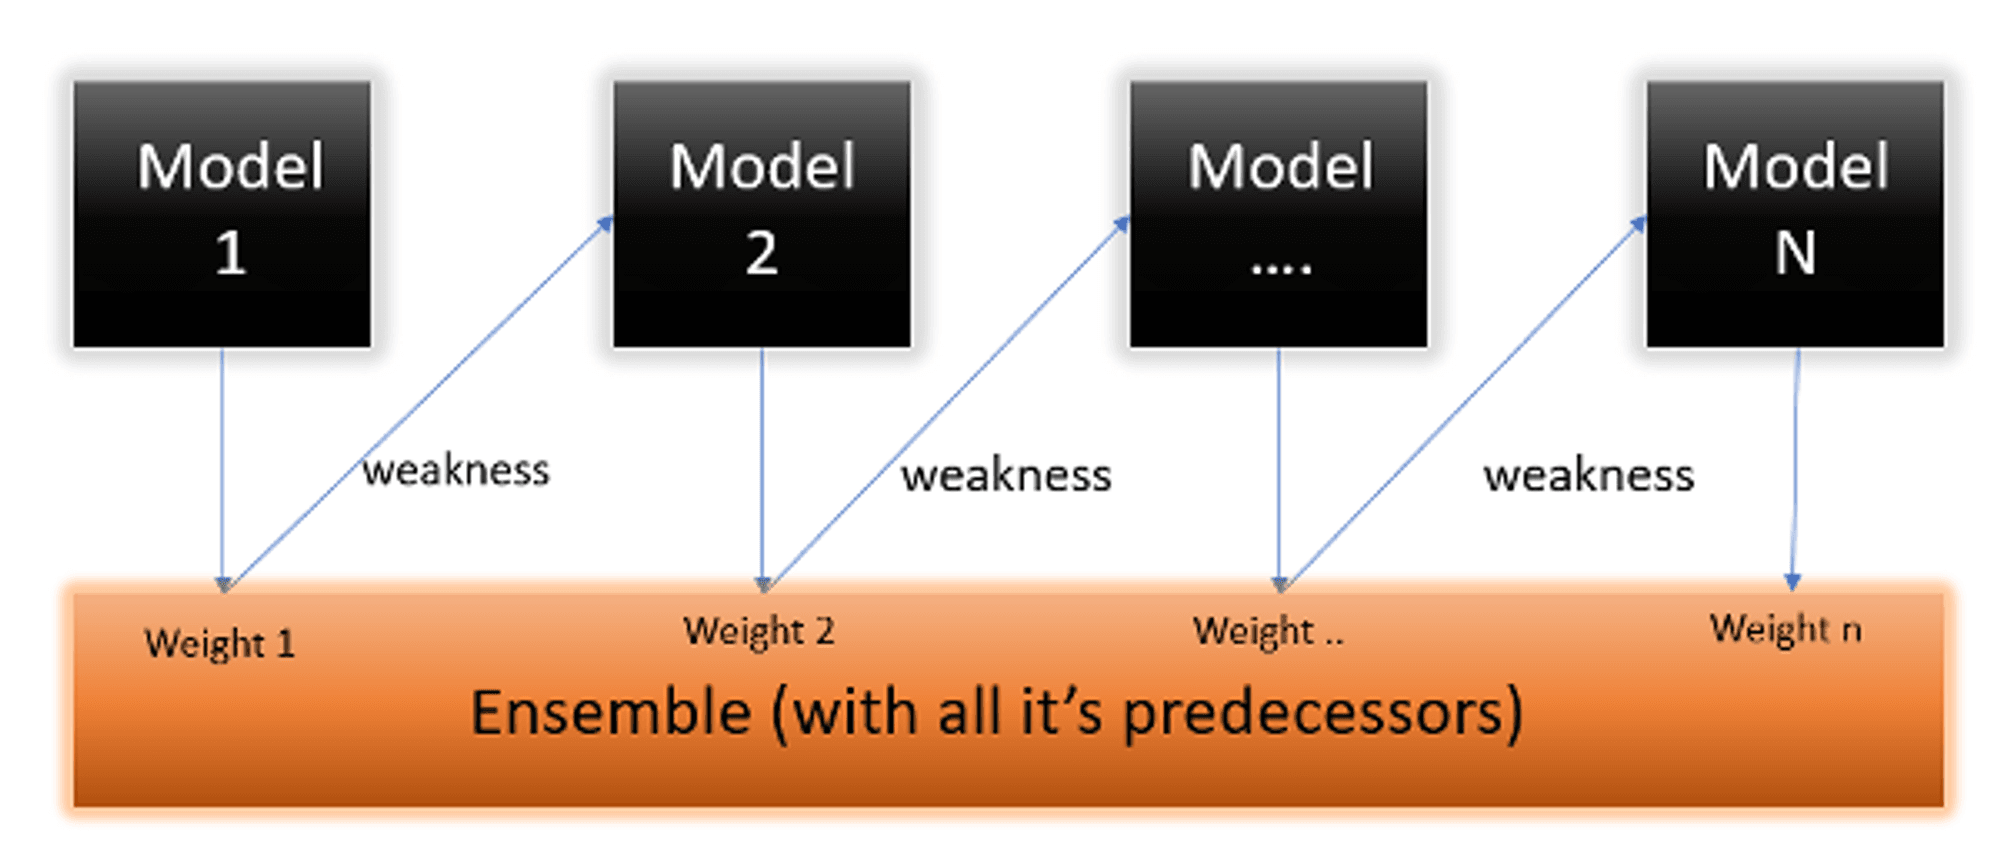

AdaBoost algorithm falls under ensemble boosting techniques, as we will discuss it combines multiple models to produce more accurate results and this is done in two phases:

- 1.Multiple weak learners are allowed to learn on training data
  
- 2.Combining these models to generate a meta-model, this meta-model aims to resolve the errors as predicted by the individual weak learners..

## What is AdaBoost

- AdaBoost short for Adaptive Boosting is an ensemble learning used in machine learning for classification and regression problems. The main idea behind AdaBoost is to iteratively train the weak classifier on the training dataset with each successive classifier giving more weightage to the data points that are misclassified.

- The final AdaBoost model is decided by combining all the weak classifier that has been used for training with the weightage given to the models according to their accuracies. The weak model which has the highest accuracy is given the highest weightage while the model which has the lowest accuracy is given a lower weightage. 

## Institution Behind AdaBost Algorithm

AdaBoost techniques combine many weak machine-learning models to create a powerful classification model for the output. The steps to build and combine these models are as follows:



**Step 1: Initialize the weights**

- For a dataset with N training data points, initialize N weights for each data point with:
  
$$ W_i = \frac{1}{N} $$




**Step 2: Train weak classifiers**

- Train a weak classifier $ M_k $  where k is the current iteration.

- The weak classifier we are training should have an accuracy greater than 0.5, which means it should perform better than a naive guess.




**Step 3: Calculate the error rate and importance of each weak model $ M_k $**

- Calculate the error rate for every weak classifier Mk on the training dataset:

  error_rate = (sum of weights of misclassified points) / (sum of all weights)

- Calculate the importance of each model using the formula:

  $$ \alpha_k = \frac{1}{2} \cdot \ln\left(\frac{1 - \text{error\_rate}}{\text{error\_rate}}\right) $$





**Step 4: Update data point weight for each data point $ W_i $**

- After applying the weak classifier model to the training data, we will update the weight assigned to the points using the accuracy of the model. The formula for updating the weights is:
  
   $$ W_i = W_i \cdot \exp(-\alpha_k \cdot y_i \cdot M_k(x_i)) $$


Here, $ y_i $  is the true output, $ x_i $ is the corresponding input vector, and $ Mk(x_i) $ is the prediction of the weak model.




**Step 5: Normalize the instance weight**

- We will Normalize the instance weights so that they sum up to 1 using the formula:
  
  $$ W_i = \frac{W_i}{\sum W} $$




**Step 6: Repeat steps 2-5 for K iterations**

- We will Train K classifiers, calculate model importance, and update the instance weights in each iteration.

- The final model M(X) will be an ensemble model obtained by combining these weak models weighted by their model weights:
  
  $$ M(X) = \text{sign}\left(\sum \alpha_k \cdot M_k(X)\right) $$

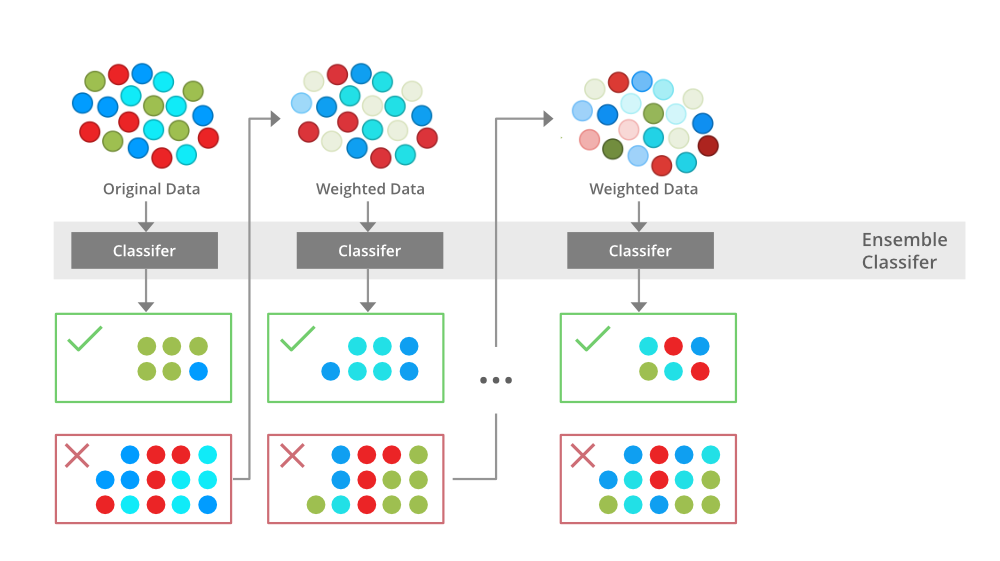

## Implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

In [3]:
data = sns.load_dataset('iris')

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['species'] = le.fit_transform(data['species'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

x = data.drop(['species'], axis =1)
y = data['species']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape, y_train.shape

((120, 4), (120,))

In [51]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
model = abc.fit(x_train, y_train)
model

AdaBoostClassifier()

In [52]:
y_pred = model.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [53]:
from sklearn.metrics import accuracy_score

acs = accuracy_score(y_test, y_pred)*100

print(f'Accuracy score :',acs)

Accuracy score : 96.66666666666667
